![](fig/univ.png)

# AI-1: ML/AI Basics
## Homework 3: Logistic Regression & Classification

**AI1 Cohort 1**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas<br />
**Maximum Score**: 125

<hr style="height:2.4pt">

In [20]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from prettytable import PrettyTable
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
sns.set()


<hr style="height:2pt">

<h2> INSTRUCTIONS </h2>


- This homework is a jupyter notebook. Download and work on it in your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

<hr style="height:2pt">

<h2> Overview </h2> 

This assignment is the first where you will go through the process of loading a dataset, splitting it in train,validation and test sets, pre-processing it, and finally using it to run models and evaluating your results. 

We have two different datasets, one with gene data from a cancer study in **Part A** and another with the COMPAS data in **Part B**.


<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part A: Cancer Classification from Gene Expressions [45 points total] </h2>    <br />

In this problem, we will build a classification model to distinguish between two related classes of cancer, acute lymphoblastic leukemia (ALL) and acute myeloid leukemia (AML), using gene expression measurements. The dataset is provided in the file `data/cancer_genes.csv`. Each row in this file corresponds to a tumor tissue sample from a patient with one of the two forms of Leukemia. The column `Cancer_type` gives the types of cancer, with **0 indicating the ALL** class and **1 indicating the AML** class. Columns 2-7130 contain expression levels of 7129 genes recorded from each tissue sample. 

In the following questions, we will use logistic regression to build classification models for this data set. 

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 1: Setting up the problem and understanding the dataset [5 points]** 

To reach the goal of classification of the classes of cancer, start by inspecting the dataset.

**1.1** [1pt] Load the dataset and split the data into an approximate 80-20 train-test sets. <br /><br />
**1.2** [2pts] Take a peek at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1. 
<br />**NOTE: for the entirety of this homework assignment associated with this dataset, you will use these normalized values, not the original, raw values.** <br/><br />
**1.3** [2pts] The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset? Explain in 3 or fewer sentences. <br /><br />


## Solutions 

### 1.1
**Load the dataset and split the data into an approximate 80-20 train-test sets.**

In [56]:
np.random.seed(10)
df = pd.read_csv('cancer_genes.csv', index_col=0)
print(df.head())
X = df.drop(['Cancer_type'],axis=1)
y = df['Cancer_type']
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, stratify=y, random_state = 109)

     Cancer_type  AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  \
0            0.0     -214.000000     -153.000000      -58.000000   
1            0.0     -135.000000     -114.000000      265.000000   
2            0.0     -106.000000     -125.000000      -76.000000   
3            0.0      -72.000000     -144.000000      238.000000   
4            0.0     -413.000000     -260.000000        7.000000   
..           ...             ...             ...             ...   
747          0.0       88.295371     -230.467187     -116.136493   
748          1.0        8.984016      -46.148181     -442.518501   
749          1.0     -161.209988     -415.412014     -369.440813   
750          0.0      -16.049201      -10.897558      220.215468   
751          1.0      -95.444209       13.559080       79.552563   

     AFFX-BioC-5_at  AFFX-BioC-3_at  AFFX-BioDn-5_at  AFFX-BioDn-3_at  \
0         88.000000     -295.000000      -558.000000       199.000000   
1         12.000000     -419.000000  

### 1.2

**Take a peek at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1.**
<br />NOTE: for the entirety of this homework assignment associated with this dataset, you will use these normalized values, not the original, raw values.

In [17]:
print(df.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(df.Cancer_type.value_counts(normalize=True))

(752, 7130)
(601, 7129) (151, 7129) (601,) (151,)
0.0    0.511968
1.0    0.488032
Name: Cancer_type, dtype: float64


In [18]:
X_train.describe()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,...,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,-115.860969,-160.846155,26.545301,209.733439,-248.992903,-405.422569,-24.135140,-188.491329,74.777098,97.436777,...,161.766492,707.377318,4.198787,421.466477,-50.023954,819.053113,329.803212,8.803791,507.250039,-24.377549
std,170.571929,188.676919,207.781982,202.987246,207.328054,261.112412,535.143398,163.077167,174.693115,358.897719,...,165.152970,526.644408,152.401188,589.914084,106.864078,814.898058,367.788891,85.397644,939.394188,71.102874
min,-894.789505,-1095.737090,-645.439001,-425.750627,-1154.285694,-1091.492494,-2066.516448,-728.996262,-770.025847,-1176.663615,...,-501.285884,-1010.430536,-447.077819,-1870.955269,-432.967768,-2151.593119,-651.051441,-255.419724,-2754.665185,-237.864216
25%,-222.586579,-270.502055,-95.000000,85.327810,-379.048622,-567.547758,-338.435164,-302.872287,-20.739507,-117.000000,...,67.861184,361.596510,-88.660905,88.409441,-105.000000,270.198265,90.825501,-40.391630,-50.785999,-73.000000
50%,-105.139096,-145.829450,21.183690,207.291048,-231.007621,-433.214742,-39.581881,-175.586059,90.170754,101.975176,...,153.253301,679.935520,9.960900,381.000000,-35.000000,749.281111,296.978609,7.968505,407.942117,-25.403427
75%,-4.789696,-40.599329,127.821586,331.277808,-116.000000,-252.587379,325.000000,-74.379003,190.551199,288.503617,...,263.112797,1076.075567,96.051876,720.339588,19.775025,1286.343005,521.096719,62.794411,1092.430279,19.740635
max,516.618491,384.626762,748.233182,1022.560525,308.876677,607.737258,1385.881293,263.634029,589.778466,1355.537180,...,686.321597,2522.188808,481.820516,3982.980299,215.047697,3743.264860,1996.244626,274.575647,3315.374276,224.773440


In [19]:
min_vals = X_train.min()
max_vals = X_train.max()

X_train = (X_train - min_vals)/(max_vals - min_vals)
X_test = (X_test - min_vals)/(max_vals - min_vals)

### 1.3

**The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset? Explain in 3 or fewer sentences.**

Linear Regression and Logisitic Regression does not work. We need to regularize or reduce dimensions. 

The training set is improper as it contains many more columns compared to number of samples. If we fit models to the given dataset, they will be highly overfitted. This is called the curse of dimensionality.

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**Question 2: Determining the best predictors [15 points]** 
<br /><br />
 
**2.1** [10pts] The aim is to determine which 10 genes individually discriminate between the two cancer classes the best (consider every gene in the dataset). 
 
**Hint:** You may use t-testing to make this determination: https://en.wikipedia.org/wiki/Welch%27s_t-test .
 
<br /><br />
**2.2** [5pts] Call the predictor that discriminates the best above `best_predictor` and plot two histograms of this predictor -- one using the training set and another using the testing set. Each histogram should clearly distinguish two different `Cancer_type` classes.


## Solutions 

### 2.1
**The aim is to determine which 10 genes individually discriminate between the two cancer classes the best (consider every gene in the dataset).**

**Hint: You may use t-testing to make this determination: https://en.wikipedia.org/wiki/Welch%27s_t-test .**

In [20]:
# your code here 
s1 = X_train[y_train==0]
s2 = X_train[y_train==1]
m1 = s1.mean()
m2 = s2.mean()
std1 = s1.std()
std2 = s2.std()
n1 = len(s1)
n2 = len(s2)

t_stats = np.abs(m1-m2)/np.sqrt((std1**2/n1) + (std2**2/n2))

t_stats = t_stats[np.argsort(-1*np.abs(t_stats))]
best_pred = t_stats.index[0]
top10 = t_stats.index[:10]
print("The best predictor to discriminate between the 2 cancer classes is",best_pred, end="\n\n")
print("The top 10 best predictors are", list(top10), sep = "\t")

The best predictor to discriminate between the 2 cancer classes is M31523_at

The top 10 best predictors are	['M31523_at', 'X95735_at', 'M84526_at', 'X61587_at', 'U50136_rna1_at', 'X17042_at', 'U29175_at', 'Y08612_at', 'Z11793_at', 'X76648_at']


### 2.2
**Call the predictor that discriminates the best above best_predictor and plot two histograms of this predictor -- one using the training set and another using the testing set. Each histogram should clearly distinguish two different Cancer_type classes.**

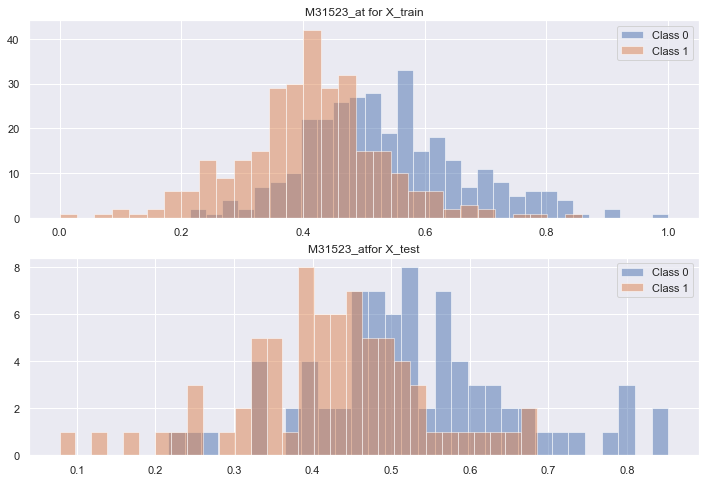

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.hist( X_train[y_train==0][best_pred], alpha = 0.5, bins=30, label='Class 0')
plt.hist( X_train[y_train==1][best_pred], alpha = 0.5, bins=30, label='Class 1')
plt.title(best_pred + " for X_train")
plt.legend()

plt.subplot(212)
plt.hist( X_test[y_test==0][best_pred], alpha = 0.5,bins=30,label='Class 0')
plt.hist( X_test[y_test==1][best_pred], alpha = 0.5,bins=30, label='Class 1')
plt.title(best_pred + "for X_test")
plt.legend();

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">

**Question 3: Predicting the types of cancer based on gene expression [25 points]**
<br /><br />

**3.1** [10pts] Fit a simple logistic regression model to the training set using the single gene predictor `best_predictor` identified in the previous part to predict cancer type. <br/>
**Note:** Remember, you need to set the regularization parameter for sklearn's logistic regression function to be a very large value in order to not regularize (use 'C=100000').
<br /><br />

**3.2** [5pts] Print and interpret Logistic Regression coefficient and intercept. 
<br /><br />
**3.3** [10pts] Create 2 plots (with training and testing data) with the following items displayed on each plot.

- the predicted probabilities of the logistic regression model as a function of the best gene predictor. 
- the true binary response. 
- a horizontal line at $y=0.5$. 

## Solutions

### 3.1
**Fit a simple logistic regression model to the training set using the single gene predictor best_predictor identified in the previous part to predict cancer type.**<br />
Note: Remember, you need to set the regularization parameter for sklearn's logistic regression function to be a very large value in order to not regularize (use 'C=100000').

In [24]:
res = []
logreg = LogisticRegression(C=100000, solver='lbfgs')
logreg.fit(X_train[[best_pred]], y_train) 

y_train_pred_logreg = logreg.predict(X_train[[best_pred]])
y_test_pred_logreg = logreg.predict(X_test[[best_pred]])

train_score_logreg = accuracy_score(y_train, y_train_pred_logreg)
test_score_logreg = accuracy_score(y_test, y_test_pred_logreg)

print("Train score:", train_score_logreg, "Test score:", test_score_logreg)

res.append([['Logistic Regression train', train_score_logreg], ['Logistic Regression test', test_score_logreg]] )
print(res)

Train score: 0.7071547420965059 Test score: 0.7086092715231788
[[['Logistic Regression train', 0.7071547420965059], ['Logistic Regression test', 0.7086092715231788]]]


### 3.2
**Print and interpret Logistic Regression coefficient and intercept.**

In [25]:
logreg.intercept_, logreg.coef_, -logreg.intercept_/logreg.coef_

(array([4.07730445]), array([[-8.75716206]]), array([[0.46559655]]))

The slope is how steep is the sigmoid function is. Negative slope indicates probability of predicting y = 1 decreases as X gets larger. 

The intercept offers an indication of how much right or left shifted the curve (inflection point) is by -intercept/slope: the curve is approx 0.4656 to the right in this case.

In [34]:
print("Intercept:",logreg.intercept_)
print("When %s is 0, log odds are %.5f "%(best_pred,logreg.intercept_),end="\n\n")

prob = logreg.predict_proba(np.array([0]).reshape(-1,1))[0,1] #Predictions when best_pred = 0 for class 1
print("In other words, we predict `cancer_type` 1 with %.5f probability "%(prob))

Intercept: [4.07730445]
When M31523_at is 0, log odds are 4.07730 

In other words, we predict `cancer_type` 1 with 0.98333 probability 


In [36]:
print("A one-unit increase in coefficient (%s) is associated with an increase in the odds of `cancer_type` by %.5f"%(best_pred,np.exp(logreg.coef_)))
 

A one-unit increase in coefficient (M31523_at) is associated with an increase in the odds of `cancer_type` by 0.00016


### 3.3
<b>
Create 2 plots (with training and testing data) with the following items displayed on each plot.

- the predicted probabilities of the logistic regression model as a function of the best gene predictor.<br />
- the true binary response.<br />
- a horizontal line at y=0.5.
</b>

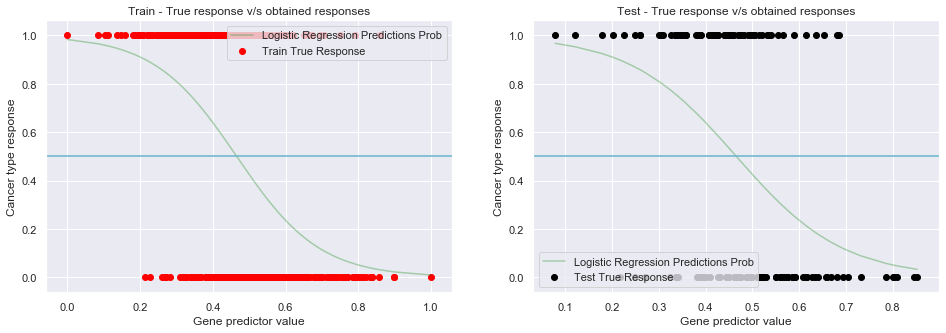

In [37]:
y_train_pred_logreg_prob = logreg.predict_proba(X_train[[best_pred]])[:,1]
y_test_pred_logreg_prob = logreg.predict_proba(X_test[[best_pred]])[:,1]

fig, ax = plt.subplots(1,2, figsize=(16,5))
sort_index = np.argsort(X_train[best_pred].values)

# plotting true binary response
ax[0].scatter(X_train[best_pred].iloc[sort_index].values, y_train.iloc[sort_index].values, color='red', label = 'Train True Response')

# plotting logreg prob output
ax[0].plot(X_train[best_pred].iloc[sort_index].values, y_train_pred_logreg_prob[sort_index], alpha=0.3,  \
         color='green', label = 'Logistic Regression Predictions Prob')

ax[0].axhline(0.5, c='c')
ax[0].legend()
ax[0].set_title('Train - True response v/s obtained responses')
ax[0].set_xlabel('Gene predictor value')
ax[0].set_ylabel('Cancer type response');

# Test
sort_index = np.argsort(X_test[best_pred].values)

# plotting true binary response
ax[1].scatter(X_test[best_pred].iloc[sort_index].values, y_test.iloc[sort_index].values, color='black', label = 'Test True Response')


# plotting logreg prob output
ax[1].plot(X_test[best_pred].iloc[sort_index].values, y_test_pred_logreg_prob[sort_index], alpha=0.3,  \
         color='green', label = 'Logistic Regression Predictions Prob')

ax[1].axhline(0.5, c='c')
ax[1].legend()
ax[1].set_title('Test - True response v/s obtained responses')
ax[1].set_xlabel('Gene predictor value')
ax[1].set_ylabel('Cancer type response');

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part B: Racial bias in machine learning systems [60 points total] </h2>    <br />


![](https://static.propublica.org/projects/algorithmic-bias/assets/img/generated/opener-b-crop-2400*1350-00796e.jpg)

<br /><br />
<b> Dataset Description </b><br /><br />
The main dataset is the *compas.csv*.
The variables are roughly explained in the `compas_datadict.csv` file, and ProPublica's analysis is publically available here: https://github.com/propublica/compas-analysis.

The dataset was made publically available by **Northpointe**, an American tech-company that works with law establishment across several states in the US to predict future crimes based on past records of criminals.

It has been suspected that the software used by Northpointe, `COMPAS`, is biased against the african american criminals, who end up with `high-risk` tags, despite minor criminal record, whereas `Caucasians` regularly received low-scores despite more significant criminal charges.
    
After pressure from several news agencies and a public investigation by ProPublica, the company released this dataset with a slice of the factors usually considered in order to assign a score to criminals.
<br /><br />
The dataset also contains a column `two_year_recid` with a binary response, i.e `1` if the released criminal ended up committing another crime within two years and `0` if the criminal did not commit a crime within a period of two years.
    
To learn more about this dataset, and the public investigation, you are highly recommended to read ProPublica's article on [Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 1: Setting up the problem and understanding the data [15 points]**

**1.1** [1pt] Split the data into 80% training and 20% validation sets stratified by race.

By Stratified we mean that the two sets should have roughly similar distribution of races as the original data. For more information on how to stratify using sklearn, check sklearn documentation here.<br />

NOTE: Before splitting you may want to process the categorical predictors first so you don't have to do it separately in train and validation later. 
<br /><br />
**1.2** [4pts] Can you guess why processing the categorical predictors important? What is the risk of processing categorical predictors after splitting into train and validation sets?
<br /><br />

**1.3** [8pts] Make overlapping distributions (histograms) of the following predictors for two groups, African American & Caucasian.
- Age
- Priors count
- Sex
- Length of stay
<br /><br />

**1.4** [2pts] Among the following variables, which ones show disparity between the two groups? Explain your results in 2-3 sentences.
<br /><br />

## Solutions

### 1.1
<b>
Split the data into 80% training and 20% validation sets stratified by race.

By Stratified we mean that the two sets should have roughly similar distribution of races as the original data. For more information on how to stratify using sklearn, check sklearn documentation here.
<br />
NOTE: Before splitting you may want to process the categorical predictors first so you don't have to do it separately in train and validation later.

In [4]:
# Get the data
df = pd.read_csv('compas.csv')

#Splitting the races
aa_df = df[df['race'] == 'African-American']
cc_df = df[df['race'] == 'Caucasian']

df.head()

,age,c_charge_degree,c_charge_desc,race,score_text,sex,priors_count,juv_fel_count,juv_misd_count,juv_other_count,...,priors_1,priors_234,priors_5plus,juv_fel_1plus,juv_misd_1plus,juv_other_1plus,charge_any_drug,charge_any_violence_aggression,charge_any_theft,length_of_stay_thresh
0,50,M,arrest case no charge,Caucasian,Medium,0,30,0,0,0,...,0,0,1,0,0,0,0,0,0,4
1,28,M,Susp Drivers Lic 1st Offense,African-American,Medium,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24,F,Aggravated Assault W/dead Weap,Other,Low,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,5
3,25,F,Burglary Unoccupied Dwelling,Hispanic,Medium,0,14,0,1,2,...,0,0,1,0,1,1,0,0,1,1
4,34,F,Possession of Cannabis,African-American,Medium,1,7,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [5]:
# One hot encode
one_hot_df = pd.get_dummies(df['race'], prefix='race', drop_first = True)

# columns of interest
cols = df.select_dtypes(include=np.number).columns.tolist()
df_race = pd.concat([df[cols], one_hot_df], axis=1)

## Splitting the data

data_train, data_val = train_test_split(df_race, train_size = 0.8, stratify = df['race'], random_state = 109)
y_train, X_train = data_train.two_year_recid, data_train.drop(['two_year_recid'], axis=1)
y_val, X_val = data_val.two_year_recid, data_val.drop(['two_year_recid'], axis=1)

### 1.2
<b>Can you guess why processing the categorical predictors important? What is the risk of processing categorical predictors after splitting into train and validation sets?

We process the categorical predictors before splitting to make sure that we don't lose some categories due to the split. If this happens we might not have any encoding for a particular value the categorical variable takes.

### 1.3
<b>
Make overlapping distributions (histograms) of the following predictors for two groups, African American & Caucasian.
- Age
- Priors count
- Sex
- Length of stay


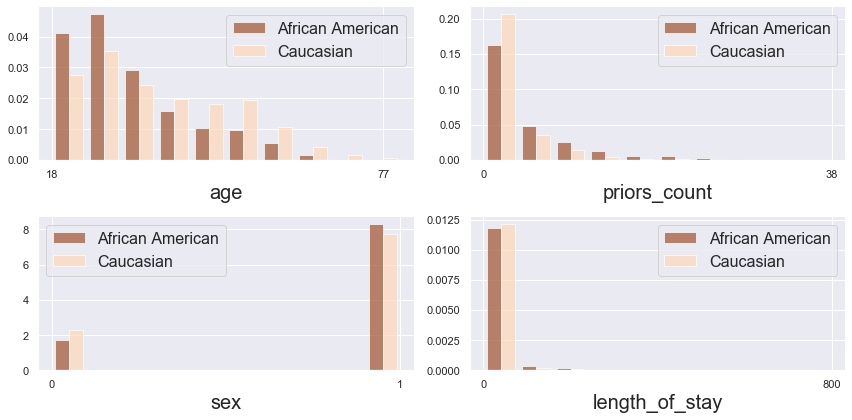

In [57]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,6))
ax = ax.ravel()
colors = ['sienna','peachpuff']

for i, col in enumerate(['age', 'priors_count','sex','length_of_stay']):
    aa = np.array(aa_df[col]).flatten() 
    cc = np.array(cc_df[col]).flatten()
    ax[i].hist([aa,cc], label = ['African American','Caucasian'], alpha = 0.7, density = True,bins = 10,color=colors)
    ax[i].set_xlabel(f'{col}',fontsize = 20)
    ax[i].set_xticks([aa.min(),aa.max()])
    ax[i].legend(fontsize = 16)
sns.despine();
plt.tight_layout()

### 1.4
<b> 
Among the following variables, which ones show disparity between the two groups? Explain your results in 2-3 sentences.

Priors count and age are the 2 variables that shows disparity. <br>
Age: In the younger brackets, we have more of African-American and in the older age bracket, we seem to have more of Caucasian.
Prior Count: African americans seems to have more prior counts in general according to the data.

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
   
**Question 2: Baseline model fitting [19 points]**

**2.1** [15pts] Build a logistic regression model to predict recidivism (`two_year_recid`) on these data and be sure to include race as a predictor.<br />
**NOTE**: In your list of predictors, `race` is one of the predictors.

Report the following on the **validation set**:
1. Overall model accuracy as a percentage
2. *False Positive Rate(FPR)* as a percentage for:
    - `African Americans`
    - `Cacausians`
3. *False Negative Rate(FNR)* as a percentage for:
    - `African Americans`
    - `Caucasians`
4. Ratio of the FPR between `African_Americans` and `Caucasians`
5. Ratio of the FNR between `African_Americans` and `Caucasians`

i.e $\frac{FPR(AA)}{FPR(CC)}$ and $\frac{FNR(AA)}{FNR(CC)}$

<br  /><br />
**2.2** [4pts] What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups?
Explain your findings in 3-6 sentences.


## Solutions

### 2.1
<b> 
Build a logistic regression model to predict recidivism (two_year_recid) on these data and be sure to include race as a predictor.

In [6]:
logreg = LogisticRegression(C=100000, solver = 'lbfgs', max_iter = 10000)
logreg.fit(X_train, y_train)

ypred_train = logreg.predict(X_train)
ypred_val = logreg.predict(X_val)

print(f' Training set accuracy = {round(accuracy_score(y_train, ypred_train),2)} \n validation set accuracy = {round(accuracy_score(y_val, ypred_val),2)}')

 Training set accuracy = 0.7 
 validation set accuracy = 0.68


In [7]:
# Separating the races 
X_val = X_val.reset_index(drop='True')

aa_ind = np.array(X_val[(X_val['race_Asian'] == 0) & (X_val['race_Caucasian'] == 0) 
                & (X_val['race_Other'] == 0) & (X_val['race_Native American'] == 0)].index.tolist())

cc_ind = np.array(X_val[X_val['race_Caucasian'] == 1].index.tolist())

In [8]:
aa_fplist = []
cc_fplist = []
print('African Americans')
aa_cm = metrics.confusion_matrix(np.array(y_val)[aa_ind], np.array(ypred_val)[aa_ind])  
print(aa_cm)

print('Caucasians')
cc_cm = metrics.confusion_matrix(np.array(y_val)[cc_ind], np.array(ypred_val)[cc_ind])
print(cc_cm)

fp_aa, fn_aa, fp_cc, fn_cc = round(aa_cm[0,1]/aa_cm[0].sum()*100,2),round(aa_cm[1,0]/aa_cm[1].sum()*100,2),round(cc_cm[0,1]/cc_cm[0].sum()*100,2),round(cc_cm[1,0]/cc_cm[1].sum()*100,2)
aa_fplist.append(fp_aa)
cc_fplist.append(fp_cc)
x = PrettyTable()
x.field_names = ['Race','African Americans','Caucasians']
x.add_row(['False +ves %', fp_aa, fp_cc])
x.add_row(['False -ves %', fn_aa, fn_cc])
print(x,"\n\n")

print(f'African Americans {fp_aa/fp_cc:0.1f}x more likely to be falsely flagged compared to Caucasians')

print(f'Caucasians {fn_cc/fn_aa:0.1f}x more likely to be mislabeled as low risk compared to African Americans')

African Americans
[[221 104]
 [107 231]]
Caucasians
[[185  59]
 [ 69  65]]
+--------------+-------------------+------------+
|     Race     | African Americans | Caucasians |
+--------------+-------------------+------------+
| False +ves % |        32.0       |   24.18    |
| False -ves % |       31.66       |   51.49    |
+--------------+-------------------+------------+ 


African Americans 1.3x more likely to be falsely flagged compared to Caucasians
Caucasians 1.6x more likely to be mislabeled as low risk compared to African Americans


### 2.2
<b>
What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups?
Explain your findings in 3-6 sentences.

Yes, African-Americans are substantially more likely to be falsely labelled as positive, than Caussians <br>
On the other hand, Caucasians are much more likely to be falsely labelled as negative, than African-Americans which compliments the first point

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 3: 'Race'less model fitting [16 points]**
 
**3.1** [10pts] Refit the logistic model in 2.1 but this time **without** `race` as a predictor. 
Again, Report the following on the **validation set**:
1. Overall model accuracy as a percentage
2. **False Positive Rate(FPR)** as a percentage for:
    - African Americans
    - Caucasians
2. **False Negative Rate(FNR)** as a percentage for:
    - African Americans
    - Caucasians
3. 
    - Ratio of the FPR between `African_Americans` and `Caucasians`
    - Ratio of the FNR between `African_Americans` and `Caucasians`

i.e $\frac{FPR(AA)}{FPR(CC)}$ and $\frac{FNR(AA)}{FNR(CC)}$


<br /><br />

**3.2** [2pts] Now, without the `race` as a predictor, what do you observe? 
<br /><br />
**3.3** [2pts] How do these compare to the model when the race **is** included as a predictor?
<br /><br />
**3.4** [2pts] Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not?  Why is the bias still occurring or not occurring?  Explain in 3-6 sentences total.


## Solutions

### 3.1
<b>
Refit the logistic model in 2.1 but this time without race as a predictor. 

In [9]:
# Not to include 'race' as a predictor 

data_train, data_val = train_test_split(df[cols], train_size = 0.8, stratify = df['race'], random_state=109)
y_train, X_train = data_train.two_year_recid, data_train.drop(['two_year_recid'], axis=1)
y_val, X_val = data_val.two_year_recid, data_val.drop(['two_year_recid'], axis=1)

In [13]:
logreg = LogisticRegression(C=100000, solver = 'lbfgs', max_iter = 10000)
logreg.fit(X_train, y_train)

ypred_train = logreg.predict(X_train)
ypred_val = logreg.predict(X_val)
print(f' Training set accuracy = {round(accuracy_score(y_train, ypred_train),2)} \n validation set accuracy = {round(accuracy_score(y_val, ypred_val),2)} \n\n')
print('African Americans')
aa_cm = metrics.confusion_matrix(np.array(y_val)[aa_ind], np.array(ypred_val)[aa_ind])  
print(aa_cm)
print('Caucasians')
cc_cm = metrics.confusion_matrix(np.array(y_val)[cc_ind], np.array(ypred_val)[cc_ind])
print(cc_cm)

fp_aa, fn_aa, fp_cc, fn_cc = round(aa_cm[0,1]/aa_cm[0].sum()*100,2),round(aa_cm[1,0]/aa_cm[1].sum()*100,2),round(cc_cm[0,1]/cc_cm[0].sum()*100,2),round(cc_cm[1,0]/cc_cm[1].sum()*100,2)
aa_fplist.append(fp_aa)
cc_fplist.append(fp_cc)
x = PrettyTable()
x.field_names = ['Race','African Americans','Caucasians']
x.add_row(['False +ves %', fp_aa, fp_cc])
x.add_row(['False -ves %', fn_aa, fn_cc])
print(x,"\n\n")
print(f'African Americans {fp_aa/fp_cc:0.1f}x more likely to be falsely flagged compared to Caucasians')
print(f'Caucasians {fn_cc/fn_aa:0.1f}x more likely to be mislabeled as low risk compared to African Americans')

 Training set accuracy = 0.7 
 validation set accuracy = 0.68 


African Americans
[[221 104]
 [105 233]]
Caucasians
[[190  54]
 [ 71  63]]
+--------------+-------------------+------------+
|     Race     | African Americans | Caucasians |
+--------------+-------------------+------------+
| False +ves % |        32.0       |   22.13    |
| False -ves % |       31.07       |   52.99    |
+--------------+-------------------+------------+ 


African Americans 1.4x more likely to be falsely flagged compared to Caucasians
Caucasians 1.7x more likely to be mislabeled as low risk compared to African Americans


### 3.2
<b>
Now, without the race as a predictor, what do you observe?

We observe more or less the same results whem race is not included as a predictor. This is due to the proxy variables that are indirectly affected by race. 

### 3.3
<b>How do these compare to the model when the race is included as a predictor?

The results are almost the same. 

### 3.4
<b>Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not?  Why is the bias still occurring or not occurring?  Explain in 3-6 sentences total.


The bias still occurs. The disparity is an inherent property of the dataset itself and is not due to using race as a predictor.

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 4: Receiver Operating Characteristic curve [10 points]**

**4.1** [5pts] Use logistic regression from above and plot the *Receiver Operating Characteristic curve* for two races, `African Americans` & `Caucasians`. 
<br /><br />
**4.2** [5pts] You will notice that changing the thresholds can *reduce* bias between the two classes, but it can also affect model accuracy. We want our model to be **accurate** but also **unbiased**. So what shall we do?

- Remove bias?
- Lose model accuracy?

Write down your strategy to overcome this difficulty. Please keep your answers short (300 word limit)


## Solutions

### 4.1
<b>
Use logistic regression from above and plot the Receiver Operating Characteristic curve for two races, African Americans & Caucasians.

In [14]:
# Get the data
df = pd.read_csv('compas.csv')

#Splitting the races
aa_df = df[df['race'] == 'African-American']
cc_df = df[df['race'] == 'Caucasian']

df.head()

,age,c_charge_degree,c_charge_desc,race,score_text,sex,priors_count,juv_fel_count,juv_misd_count,juv_other_count,...,priors_1,priors_234,priors_5plus,juv_fel_1plus,juv_misd_1plus,juv_other_1plus,charge_any_drug,charge_any_violence_aggression,charge_any_theft,length_of_stay_thresh
0,50,M,arrest case no charge,Caucasian,Medium,0,30,0,0,0,...,0,0,1,0,0,0,0,0,0,4
1,28,M,Susp Drivers Lic 1st Offense,African-American,Medium,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24,F,Aggravated Assault W/dead Weap,Other,Low,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,5
3,25,F,Burglary Unoccupied Dwelling,Hispanic,Medium,0,14,0,1,2,...,0,0,1,0,1,1,0,0,1,1
4,34,F,Possession of Cannabis,African-American,Medium,1,7,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [15]:
# One hot encode
one_hot_df = pd.get_dummies(df['race'], prefix='race', drop_first = True)

# columns of interest
cols = df.select_dtypes(include=np.number).columns.tolist()
df_race = pd.concat([df[cols], one_hot_df], axis=1)

## Splitting the data

data_train, data_val = train_test_split(df_race, train_size = 0.8, stratify = df['race'], random_state = 109)
y_train, X_train = data_train.two_year_recid, data_train.drop(['two_year_recid'], axis=1)
y_val, X_val = data_val.two_year_recid, data_val.drop(['two_year_recid'], axis=1)

In [16]:
logreg = LogisticRegression(C=100000, solver = 'lbfgs', max_iter = 10000)
logreg.fit(X_train, y_train)

ypred_train = logreg.predict(X_train)
ypred_val = logreg.predict(X_val)

print(f' Training set accuracy = {round(accuracy_score(y_train, ypred_train),2)} \n validation set accuracy = {round(accuracy_score(y_val, ypred_val),2)}')

 Training set accuracy = 0.7 
 validation set accuracy = 0.68


In [17]:
# Separating the races 
X_val = X_val.reset_index(drop='True')

aa_ind = np.array(X_val[(X_val['race_Asian'] == 0) & (X_val['race_Caucasian'] == 0) 
                & (X_val['race_Other'] == 0) & (X_val['race_Native American'] == 0)].index.tolist())

cc_ind = np.array(X_val[X_val['race_Caucasian'] == 1].index.tolist())

In [18]:
aa_fplist = []
cc_fplist = []
print('African Americans')
aa_cm = metrics.confusion_matrix(np.array(y_val)[aa_ind], np.array(ypred_val)[aa_ind])  
print(aa_cm)

print('Caucasians')
cc_cm = metrics.confusion_matrix(np.array(y_val)[cc_ind], np.array(ypred_val)[cc_ind])
print(cc_cm)

fp_aa, fn_aa, fp_cc, fn_cc = round(aa_cm[0,1]/aa_cm[0].sum()*100,2),round(aa_cm[1,0]/aa_cm[1].sum()*100,2),round(cc_cm[0,1]/cc_cm[0].sum()*100,2),round(cc_cm[1,0]/cc_cm[1].sum()*100,2)
aa_fplist.append(fp_aa)
cc_fplist.append(fp_cc)
x = PrettyTable()
x.field_names = ['Race','African Americans','Caucasians']
x.add_row(['False +ves %', fp_aa, fp_cc])
x.add_row(['False -ves %', fn_aa, fn_cc])
print(x)

print(f'African Americans {fp_aa/fp_cc:0.1f}x more likely to be falsely flagged compared to Caucasians')

print(f'Caucasians {fn_cc/fn_aa:0.1f}x more likely to be mislabeled as low risk compared to African Americans')

African Americans
[[221 104]
 [107 231]]
Caucasians
[[185  59]
 [ 69  65]]
+--------------+-------------------+------------+
|     Race     | African Americans | Caucasians |
+--------------+-------------------+------------+
| False +ves % |        32.0       |   24.18    |
| False -ves % |       31.66       |   51.49    |
+--------------+-------------------+------------+
African Americans 1.3x more likely to be falsely flagged compared to Caucasians
Caucasians 1.6x more likely to be mislabeled as low risk compared to African Americans


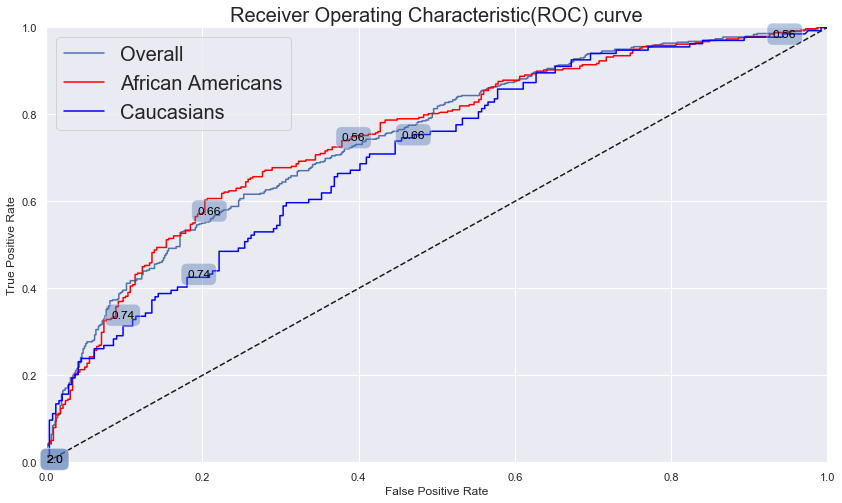

In [21]:
# Probabilities
yprobs = logreg.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, yprobs)


# aa_ind african americans
# cc_ind caucasians


aa_fpr, aa_tpr, aa_thresholds = roc_curve(y_val.values[aa_ind],yprobs[aa_ind])
cc_fpr, cc_tpr, cc_thresholds = roc_curve(y_val.values[cc_ind],yprobs[cc_ind])

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(fpr,tpr,color = 'b', label = 'Overall')
ax.plot(aa_fpr, aa_tpr, color = 'red',label = 'African Americans')
ax.plot(cc_fpr, cc_tpr, color = 'blue',label = 'Caucasians')
ax.plot([0,1],[0,1],'k--')

label_kwargs = {}
label_kwargs['bbox'] = dict(boxstyle = 'round, pad = 0.5', alpha =0.4)


n_fpr = fpr.shape[0]

for k in range(0,200,50):
    threshold = str(np.round(thresholds[k],2))
    ax.annotate(threshold, (aa_fpr[k],aa_tpr[k]), color = 'black', **label_kwargs)
    ax.annotate(threshold, (cc_fpr[k],cc_tpr[k]), color = 'black', **label_kwargs)
   
    
# Aesthetics

ax.set_xlim([0,1])
ax.set_ylim([0,1])

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic(ROC) curve',fontsize = 20)
ax.legend(loc='best',fontsize=20)
sns.despine()

### 4.2
<b>
How to ensure the model is accuracte and unbiased? Please keep your answers short (300 word limit)

Choose a threshold where the bias is the least. <br>
Do not confuse the closeness of the 2 curves with an absence of bias. To get an indication of the bias, we need to choose the same threshold and find the corresponding False Positive rate and True Positive Rate for each race.

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part C: Come up with a better model [20 points total] 
</h2>  
    
Improve the models you have previously coded by including:
 - Polynomial terms
 - Interaction terms
 - Regularization parameters
 - Different upsampling techniques
 - KNN classification

with a goal to maximize the new metric which includes both the bias and the accuracy, we define `Bias_Corrected_Accuracy(BCA)` as:
    

$$BCA = Acccuracy - {\left|FPR(AA) - FPR(CC)\right|}$$
    
 
Please report your maximum `BCA` on the forums and add the computation code to your homework for bonus points.

**Note:** The ideas given above are not exhaustive. You are free to try other betters to come up with a better model.



In [22]:
#upsampling

In [25]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

data_train, data_val = train_test_split(df[cols + ['race']], train_size = 0.8, stratify = df['race'], random_state=109)
os = SMOTE(random_state= 109)
os_data_X, os_data_y = os.fit_sample(data_train[cols],data_train['race'])

# predictors and response

X_train, y_train = os_data_X.drop(['two_year_recid'],axis=1), os_data_X.two_year_recid
y_val, X_val = data_val.two_year_recid, data_val.drop(['two_year_recid', 'race'], axis=1)

In [27]:
logreg = LogisticRegression(C=100000, solver = 'lbfgs', max_iter = 10000)
logreg.fit(X_train, y_train)

ypred_train = logreg.predict(X_train)
ypred_val = logreg.predict(X_val)
print(f' Training set accuracy = {round(accuracy_score(y_train, ypred_train),2)} \n validation set accuracy = {round(accuracy_score(y_val, ypred_val),2)} \n\n')
print('African Americans')
aa_cm = metrics.confusion_matrix(np.array(y_val)[aa_ind], np.array(ypred_val)[aa_ind])  
print(aa_cm)
print('Caucasians')
cc_cm = metrics.confusion_matrix(np.array(y_val)[cc_ind], np.array(ypred_val)[cc_ind])
print(cc_cm)

fp_aa, fn_aa, fp_cc, fn_cc = round(aa_cm[0,1]/aa_cm[0].sum()*100,2),round(aa_cm[1,0]/aa_cm[1].sum()*100,2),round(cc_cm[0,1]/cc_cm[0].sum()*100,2),round(cc_cm[1,0]/cc_cm[1].sum()*100,2)
aa_fplist.append(fp_aa)
cc_fplist.append(fp_cc)
x = PrettyTable()
x.field_names = ['Race','African Americans','Caucasians']
x.add_row(['False +ves %', fp_aa, fp_cc])
x.add_row(['False -ves %', fn_aa, fn_cc])
print(x,"\n\n")
print(f'African Americans {fp_aa/fp_cc:0.1f}x more likely to be falsely flagged compared to Caucasians')
print(f'Caucasians {fn_cc/fn_aa:0.1f}x more likely to be mislabeled as low risk compared to African Americans')

 Training set accuracy = 0.81 
 validation set accuracy = 0.67 


African Americans
[[257  68]
 [158 180]]
Caucasians
[[212  32]
 [ 90  44]]
+--------------+-------------------+------------+
|     Race     | African Americans | Caucasians |
+--------------+-------------------+------------+
| False +ves % |       20.92       |   13.11    |
| False -ves % |       46.75       |   67.16    |
+--------------+-------------------+------------+ 


African Americans 1.6x more likely to be falsely flagged compared to Caucasians
Caucasians 1.4x more likely to be mislabeled as low risk compared to African Americans


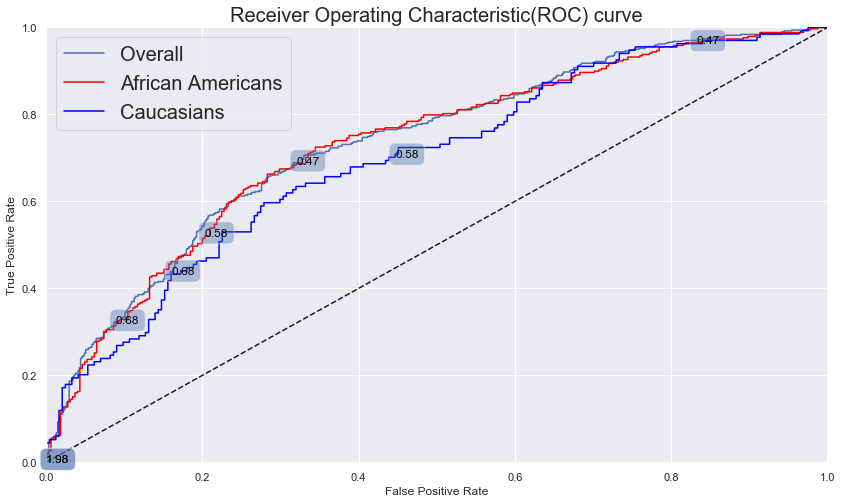

In [28]:
# Probabilities
yprobs = logreg.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, yprobs)


# aa_ind african americans
# cc_ind caucasians


aa_fpr, aa_tpr, aa_thresholds = roc_curve(y_val.values[aa_ind],yprobs[aa_ind])
cc_fpr, cc_tpr, cc_thresholds = roc_curve(y_val.values[cc_ind],yprobs[cc_ind])

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(fpr,tpr,color = 'b', label = 'Overall')
ax.plot(aa_fpr, aa_tpr, color = 'red',label = 'African Americans')
ax.plot(cc_fpr, cc_tpr, color = 'blue',label = 'Caucasians')


ax.plot([0,1],[0,1],'k--')

label_kwargs = {}
label_kwargs['bbox'] = dict(boxstyle = 'round, pad = 0.5', alpha =0.4)


n_fpr = fpr.shape[0]

for k in range(0,200,50):
    threshold = str(np.round(thresholds[k],2))
    ax.annotate(threshold, (aa_fpr[k],aa_tpr[k]), color = 'black', **label_kwargs)
    ax.annotate(threshold, (cc_fpr[k],cc_tpr[k]), color = 'black', **label_kwargs)
   
    
# Aesthetics

ax.set_xlim([0,1])
ax.set_ylim([0,1])

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic(ROC) curve',fontsize = 20)
ax.legend(loc='best',fontsize=20)
sns.despine()

In [82]:
thresholds.shape

(486,)

In [43]:
threshdict = {}
thresholds = np.linspace(0,1,101)
for i in thresholds:
    ypred_val = [1 if prob >= i else 0 for prob in yprobs]
    aa_cm = metrics.confusion_matrix(np.array(y_val)[aa_ind], np.array(ypred_val)[aa_ind]) 
    cc_cm = metrics.confusion_matrix(np.array(y_val)[cc_ind], np.array(ypred_val)[cc_ind])
    fp_aa, fn_aa, fp_cc, fn_cc = round(aa_cm[0,1]/aa_cm[0].sum()*100,2),round(aa_cm[1,0]/aa_cm[1].sum()*100,2),round(cc_cm[0,1]/cc_cm[0].sum()*100,2),round(cc_cm[1,0]/cc_cm[1].sum()*100,2)
    round(accuracy_score(y_val, ypred_val),2)
    threshdict[i] = [fp_aa,fp_cc,100*round(accuracy_score(y_val, ypred_val),2)]

In [44]:
thresh_data = list(threshdict.values())
thresh_fp_aa, thresh_fp_cc, thresh_acc = [i[0] for i in thresh_data],[i[1] for i in thresh_data],[i[2] for i in thresh_data]

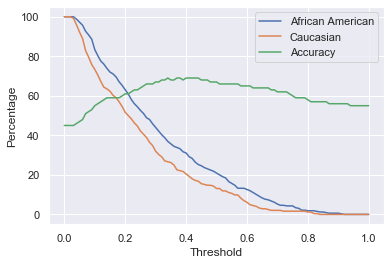

In [45]:
fig,ax = plt.subplots()
ax.plot(list(threshdict.keys()),thresh_fp_aa,label = 'African American')
ax.plot(list(threshdict.keys()),thresh_fp_cc,label = 'Caucasian')
ax.plot(list(threshdict.keys()),thresh_acc,label = 'Accuracy')
ax.set_xlabel("Threshold")
ax.set_ylabel("Percentage")
ax.legend();

In [46]:
def bca(acc,x,y):  
    x=np.array(x)
    y=np.array(y)
    acc=np.array(acc)
    return acc - np.absolute(x-y)

In [47]:
bca_list=bca(thresh_acc,thresh_fp_aa,thresh_fp_cc)

In [54]:
bca_ind=np.argmax(bca_list)
best_thresh=thresholds[bca_ind]
print("Best threshold is", best_thresh," with a BCA of", bca_list[bca_ind])
print("The corresponding accuracy is ", threshdict[best_thresh][2], "and the FPR for African Americans and Caucasians are", threshdict[best_thresh][0],"and",threshdict[best_thresh][1]," respectively.")

Best threshold is 0.5700000000000001  with a BCA of 62.61
The corresponding accuracy is  66.0 and the FPR for African Americans and Caucasians are 13.23 and 9.84  respectively.
